In [1]:
import os
os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks")

import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm



In [2]:
controls = pd.read_csv("../data/Controls_Library_Sorted_with_SynADs.csv")
controls = controls.rename(columns = {"AAseq" : "seq", "SimpleAverage" : "score"})
controls = controls[["seq", "score"]]
controls["seq"] = controls["seq"].str.strip().str.upper()
controls["screen"] = "controls"
controls = controls.drop_duplicates(subset = "seq")
controls

,seq,score,screen
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls
...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls


In [3]:
## GCN4
gcn4 = pd.read_csv("../data/Table_S5_Tile_Activities_Properties_Dataframe.csv")
gcn4 = gcn4[["ADseq", "Activity_SCglucose"]]
gcn4 = gcn4.rename(columns = {"ADseq" : "seq", "Activity_SCglucose": "score"})
gcn4["seq"] = gcn4["seq"].str.strip().str.upper()
gcn4["screen"] = "gcn4"
gcn4 = gcn4.drop_duplicates(subset = "seq").dropna()
display(gcn4)


,seq,score,screen
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,22153.46439,gcn4
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4
...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4


In [6]:
merged = pd.merge(controls, gcn4, on = "seq", suffixes = ("_controls", "_gcn4"))
merged

,seq,score_controls,screen_controls,score_gcn4,screen_gcn4
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls,16569.29690,gcn4
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls,14994.83033,gcn4
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls,36628.05513,gcn4
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls,18454.75802,gcn4
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls,257460.75220,gcn4
...,...,...,...,...,...
474,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls,261912.60730,gcn4
475,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls,16772.86384,gcn4
476,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls,17071.81293,gcn4
477,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls,257835.53940,gcn4


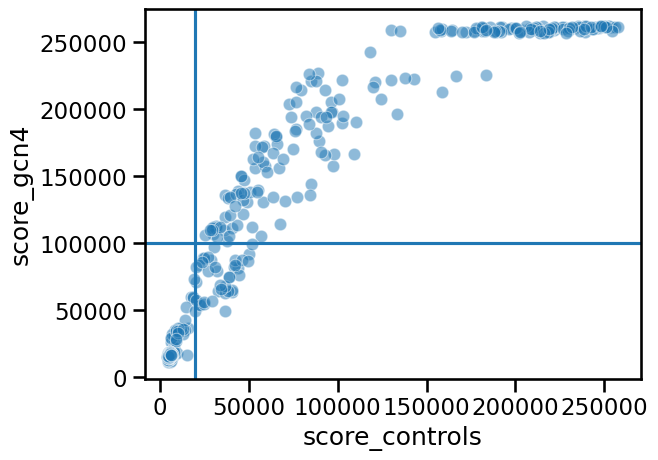

In [11]:
sns.scatterplot(data = merged, x = "score_controls", y = "score_gcn4", alpha = 0.5)
plt.axvline(19530)
plt.axhline(100000)

In [15]:
negative_controls = merged[(merged["score_gcn4"] < 100000) & (merged["score_controls"] < 19530)]
negative_controls

,seq,score_controls,screen_controls,score_gcn4,screen_gcn4
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls,16569.29690,gcn4
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls,14994.83033,gcn4
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls,36628.05513,gcn4
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls,18454.75802,gcn4
5,ADPFSTSAQVALGTPDMDSTAMTPSMSRRSSSPGSSPKSG,5985.158043,controls,17622.51165,gcn4
...,...,...,...,...,...
464,VVADVSRDRITESPASNTHVAPMMSRYDSSPGQSSSRGSQ,5387.344806,controls,17652.96564,gcn4
468,YAIPENEAADEDTMNFISSAKNDASNISNSAPFEYPHEIA,9889.061681,controls,33410.88507,gcn4
475,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls,16772.86384,gcn4
476,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls,17071.81293,gcn4


In [16]:
negative_controls.to_csv("../data/negative_controls.csv")